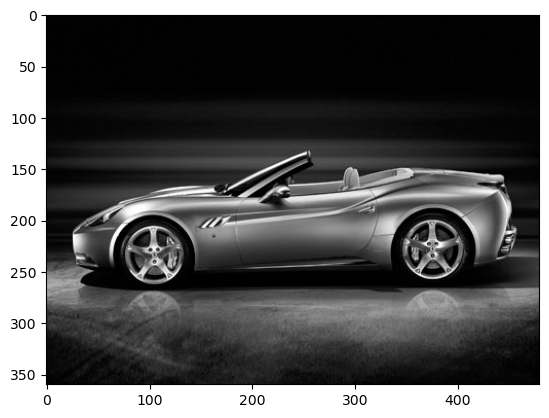

In [3]:
# libraries allowed
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math as m

# use two pictures as reference
# read the image
car_image = cv2.imread('./sport_car.png')

# print the image

plt.imshow(car_image)
plt.show()

In [4]:
# Generate two different random matrices whose values are evenly distributed in the required interval

# function to generate
def genranmatrices(rows=512, cols=512):
    t1 = np.random.randint(0, 256, (rows, cols), dtype=np.uint8)
    t2 = np.random.randint(0, 256, (rows, cols), dtype=np.uint8)
    return t1, t2

# give me look look! >_<
t1, t2 = genranmatrices()

print("t1 matrix: \n", t1)
print("t2 matrix: \n", t2)

t1 matrix: 
 [[ 32 194  30 ... 224  91  72]
 [ 30  68 115 ... 138  43  60]
 [147 196 235 ... 169  65 216]
 ...
 [246 111 208 ... 161  81  68]
 [ 60  16  18 ...  70 247 211]
 [212 243  75 ...  21  35  55]]
t2 matrix: 
 [[113 143  77 ... 191  97 166]
 [208  79 163 ... 169 212 163]
 [135 158  22 ... 106 139 160]
 ...
 [153  99 171 ... 202  24 178]
 [137 145 209 ... 251  41 229]
 [123  24 100 ... 145 250 107]]


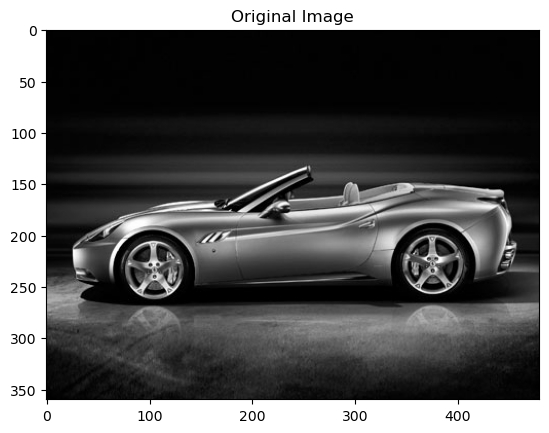

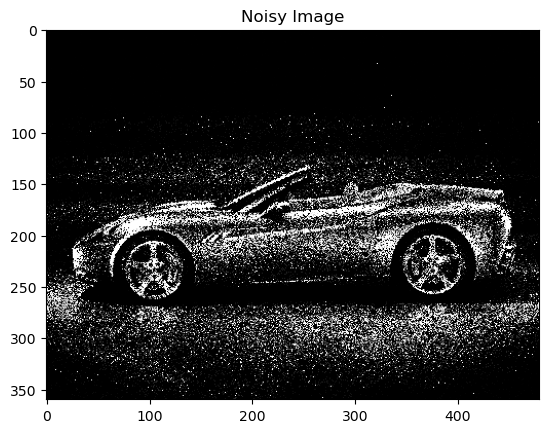

In [5]:
def genNoise(img):
    # gray level check
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # generate a matrix with the same size as the input function
    x, y = img.shape
    t1, t2 = genranmatrices(x, y)
    
    # copy image just in case
    noisy_img = img.copy()
    
    # generate the required noise
    noisy_img[img > t1] = 255
    noisy_img[img < t2] = 0
    return noisy_img


# use function to generate the graph
noisy_img = genNoise(car_image)

# print and show
plt.title("Original Image")
plt.imshow(car_image, cmap='gray')
plt.show()

plt.title("Noisy Image")
plt.imshow(noisy_img, cmap='gray') #必须加上gray，要不Matplotlib 会应用默认的颜色映射（viridis），导致灰度图像看起来是绿色的
plt.show()

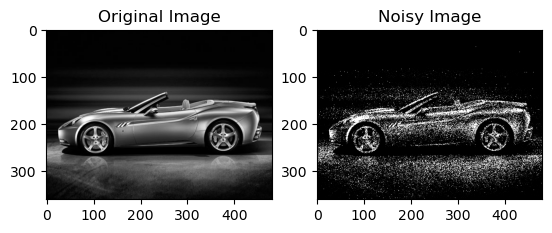

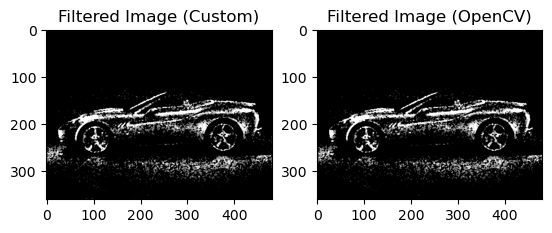

In [6]:
# Implement a median filter of size 3 × 3 medianFilter(img)

def medianFilter(img):
    # create a copy
    filtered_img = img.copy()
    rows, cols = img.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # get the 3x3 pixel (8个)
            neighbors = img[i - 1:i + 2, j - 1:j + 2].flatten()
            # median
            filtered_img[i, j] = np.median(neighbors)
    return filtered_img

# generate noise image
noisy_img = genNoise(car_image)

# median filters
filtered_img_custom = medianFilter(noisy_img)
filtered_img_opencv = cv2.medianBlur(noisy_img, 3)

# show pictures
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(car_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Noisy Image")
plt.imshow(noisy_img, cmap='gray')
    
plt.show()
    
plt.subplot(1, 2, 1)
plt.title("Filtered Image (Custom)")
plt.imshow(filtered_img_custom, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Filtered Image (OpenCV)")
plt.imshow(filtered_img_opencv, cmap='gray')

plt.show()

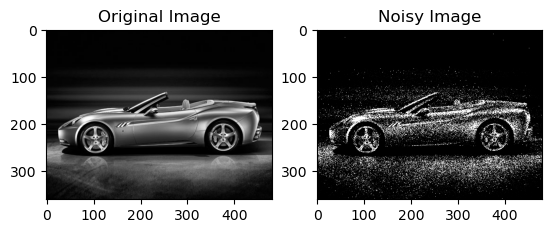

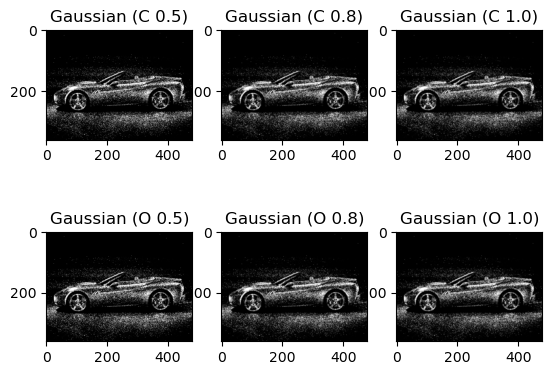

In [7]:
# Implement a Gaussian filter of kernel size 3 × 3 gaussianFilter(img, sigma).

def gaussianKernel(size, sigma): # 用一个正态分布去给核中元素赋值，平滑图像，减少噪声。
    kernel = np.fromfunction(lambda x, y: (1/ (2 * np.pi * sigma**2)) * 
                             np.exp(-((x - (size-1)/2)**2 + (y - (size-1)/2)**2) / (2 * sigma**2)), (size, size))
    return kernel / np.sum(kernel)

def gaussianFilter(img, sigma): # 用高斯核对图像进行卷积，以实现高斯平滑滤波。高斯滤波器用于减少图像噪声。
    kernel = gaussianKernel(3, sigma)
    filtered_img = cv2.filter2D(img, -1, kernel)
    return filtered_img

# generate noise image
noisy_img = genNoise(car_image)


# Implement a Gaussian filter
gaussian_filtered_custom_05 = gaussianFilter(noisy_img, 0.5)
gaussian_filtered_custom_08 = gaussianFilter(noisy_img, 0.8)
gaussian_filtered_custom_10 = gaussianFilter(noisy_img, 1.0)
gaussian_filtered_opencv_05 = cv2.GaussianBlur(noisy_img, (3, 3), 0.5)
gaussian_filtered_opencv_08 = cv2.GaussianBlur(noisy_img, (3, 3), 0.8)
gaussian_filtered_opencv_10 = cv2.GaussianBlur(noisy_img, (3, 3), 1.0)

# show pictures
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(car_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Noisy Image")
plt.imshow(noisy_img, cmap='gray')

plt.show()

plt.subplot(2, 3, 1)
plt.title("Gaussian (C 0.5)")
plt.imshow(gaussian_filtered_custom_05, cmap='gray')

plt.subplot(2, 3, 2)
plt.title("Gaussian (C 0.8)")
plt.imshow(gaussian_filtered_custom_08, cmap='gray')

plt.subplot(2, 3, 3)
plt.title("Gaussian (C 1.0)")
plt.imshow(gaussian_filtered_custom_10, cmap='gray')

plt.subplot(2, 3, 4)
plt.title("Gaussian (O 0.5)")
plt.imshow(gaussian_filtered_opencv_05, cmap='gray')

plt.subplot(2, 3, 5)
plt.title("Gaussian (O 0.8)")
plt.imshow(gaussian_filtered_opencv_08, cmap='gray')

plt.subplot(2, 3, 6)
plt.title("Gaussian (O 1.0)")
plt.imshow(gaussian_filtered_opencv_10, cmap='gray')

plt.show()